In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
df = pd.read_csv('../lab2/supervised_dataset.csv')

df.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [6]:
df.drop(df.columns[0], inplace=True, axis=1)
df.drop('_id', inplace=True, axis=1)
df.drop('source', inplace=True, axis=1)
df.dropna(inplace=True)

le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['classification'] = le.fit_transform(df['classification'])
x = df.drop('classification', axis=1)
y = df['classification']

scaler = StandardScaler()
scaler.fit(x)

x_scaled = scaler.transform(x)

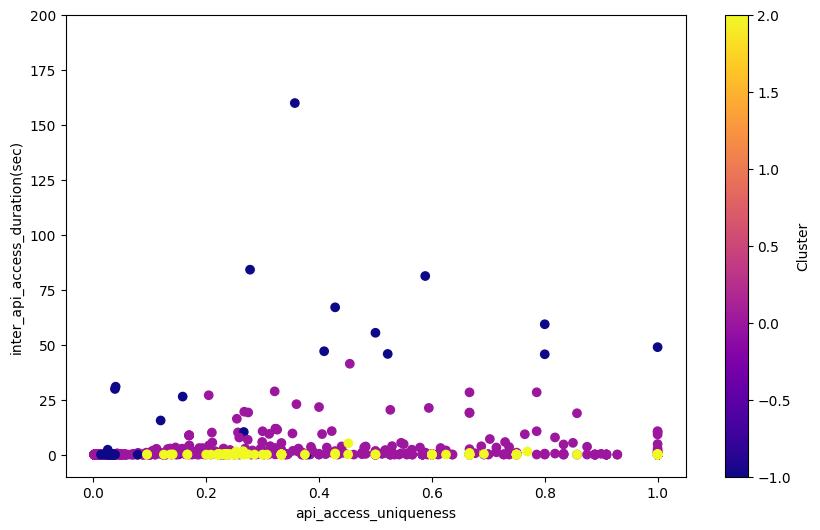

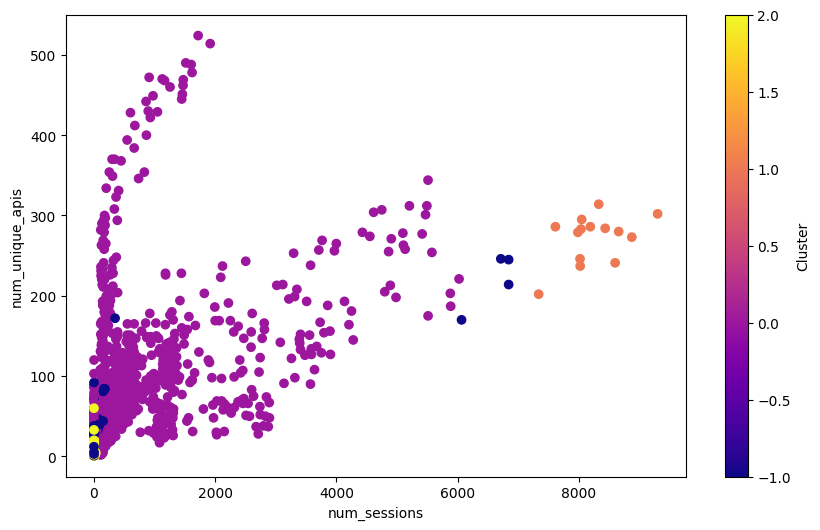

In [7]:
# DBSCAN кластеризація
dbscan = DBSCAN(eps=1.1, min_samples=10)
df['cluster'] = dbscan.fit_predict(x_scaled)

plt.figure(figsize=(10,6))
plt.scatter(x['api_access_uniqueness'], x['inter_api_access_duration(sec)'], c=df['cluster'], cmap='plasma')
plt.xlabel('api_access_uniqueness')
plt.ylabel('inter_api_access_duration(sec)')
plt.colorbar(label='Cluster')
plt.ylim(-10, 200)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x['num_sessions'], x['num_unique_apis'], c=df['cluster'], cmap='plasma')
plt.xlabel('num_sessions')
plt.ylabel('num_unique_apis')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

meanval = df[['vsession_duration(min)']].mean()['vsession_duration(min)']
group_A = df[df['vsession_duration(min)'] >= meanval]['classification']
group_B = df[df['vsession_duration(min)'] < meanval]['classification']

t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

mean_A = group_A.mean()
mean_B = group_B.mean()
print(f"Mean proportion of anomalies in Group A: {mean_A}")
print(f"Mean proportion of anomalies in Group B: {mean_B}")